In [1]:
# import pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator,TransformerMixin, ClassifierMixin
from sklearn.linear_model import LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.utils import check_array
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

/Users/lijingning/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lijingning/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# read data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Data Split

In [3]:
train, valid = train_test_split(train, test_size = 0.2)
print(train.shape)
print(valid.shape)

(3367, 378)
(842, 378)


# Data Exploration

## Normal distribution check and Transformation

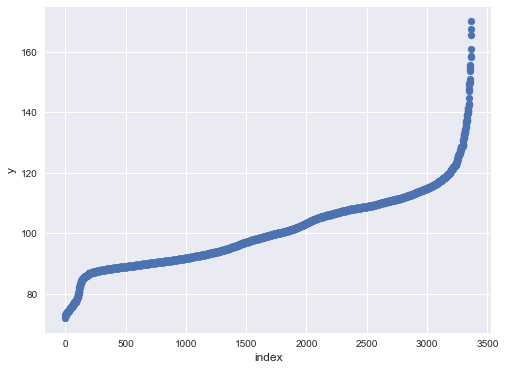

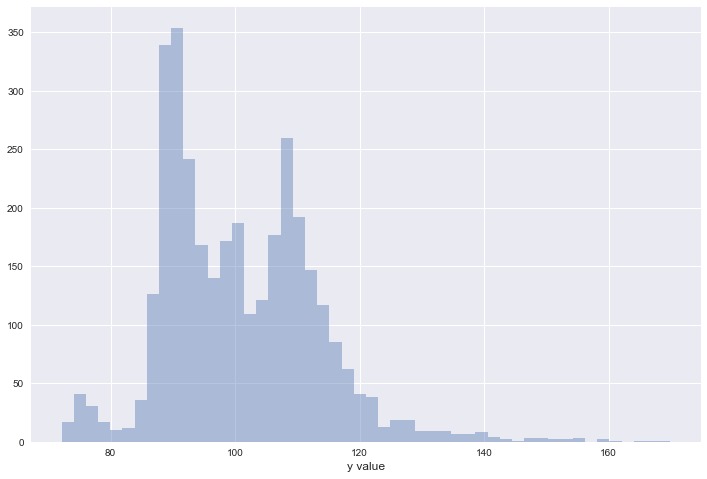

In [4]:
# plot target variable of train
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

# plot the distribution of target variable of train
plt.figure(figsize=(12,8))
sns.distplot(train.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

### y is right skewed and there exits some noise in y variable

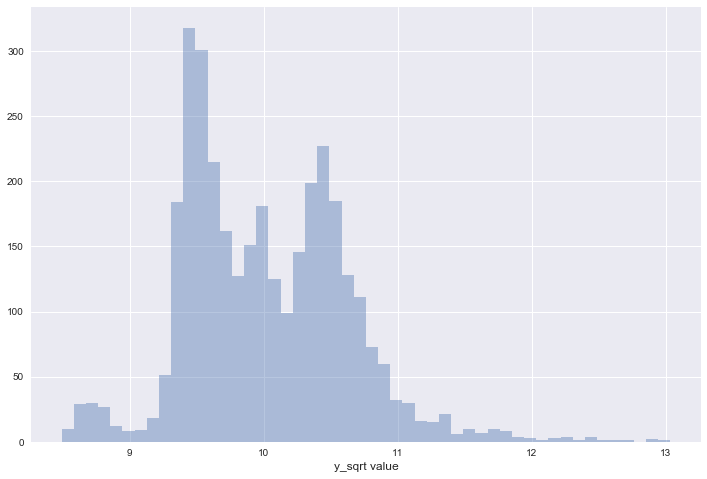

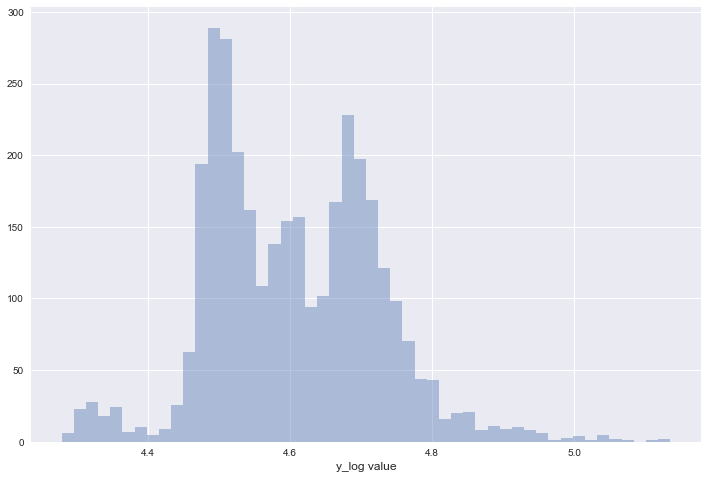

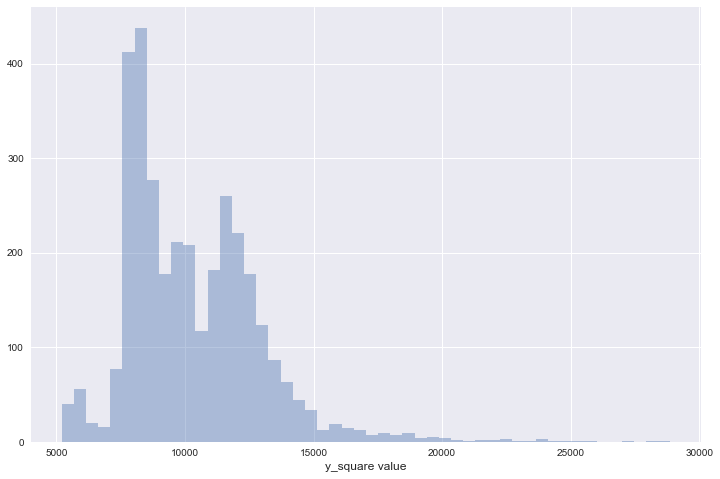

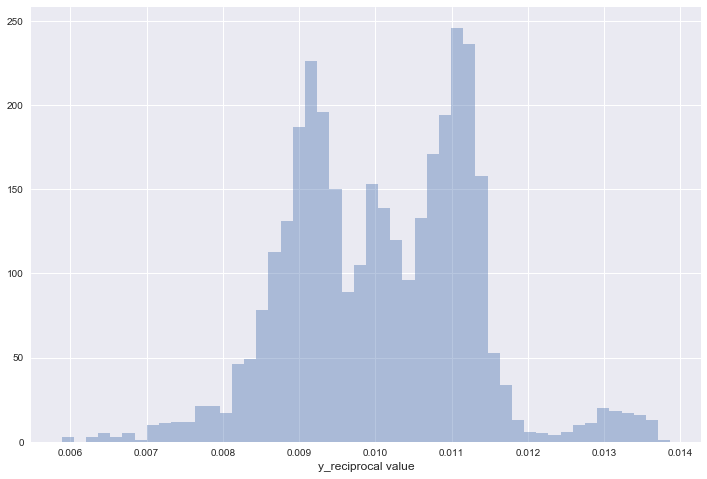

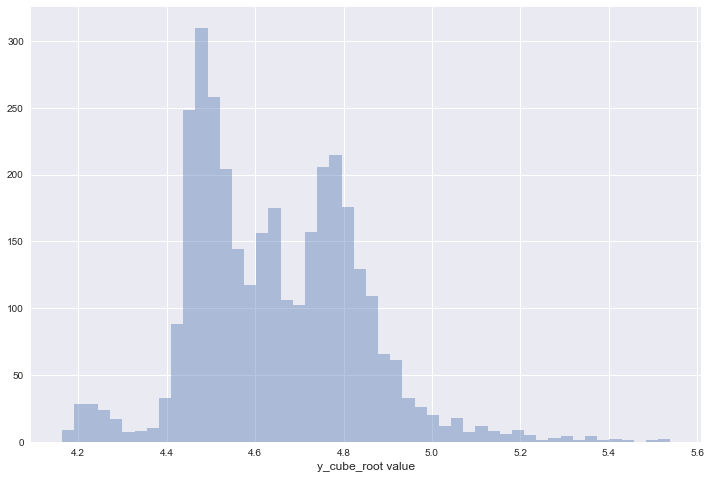

In [5]:
# try some transformation to y variable for train
## sqrt root transform
train['y_sqrt'] = np.sqrt(train['y'])
plt.figure(figsize=(12,8))
sns.distplot(train.y_sqrt.values, bins=50, kde=False)
plt.xlabel('y_sqrt value', fontsize=12)
plt.show()

##  log transform
train['y_log'] = np.log(train['y'])
plt.figure(figsize=(12,8))
sns.distplot(train.y_log.values, bins=50, kde=False)
plt.xlabel('y_log value', fontsize=12)
plt.show()

## square transform
train['y_square'] = np.square(train['y'])
plt.figure(figsize=(12,8))
sns.distplot(train.y_square.values, bins=50, kde=False)
plt.xlabel('y_square value', fontsize=12)
plt.show()

## reciprocal transform
train['y_reciprocal'] = np.reciprocal(train['y'])
plt.figure(figsize=(12,8))
sns.distplot(train.y_reciprocal.values, bins=50, kde=False)
plt.xlabel('y_reciprocal value', fontsize=12)
plt.show()

## cube root transform
train['y_cube_root'] = np.cbrt(train['y'])
plt.figure(figsize=(12,8))
sns.distplot(train.y_cube_root.values, bins=50, kde=False)
plt.xlabel('y_cube_root value', fontsize=12)
plt.show()

### according to the plots, we can see that the better transformation of y in train is reciprocal transformation

In [6]:
train = train.drop(['y_sqrt', 'y_log', 'y_square','y_cube_root','y'], axis=1)

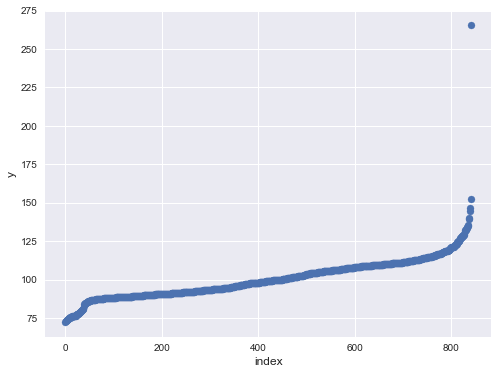

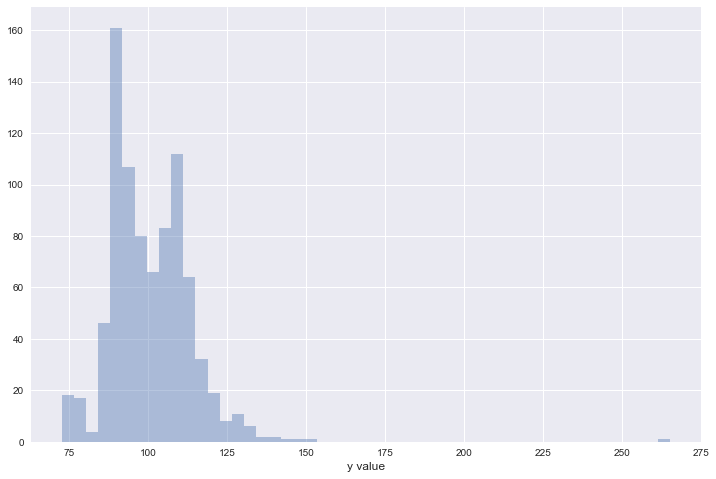

In [7]:
# plot target variable of valid
plt.figure(figsize=(8,6))
plt.scatter(range(valid.shape[0]), np.sort(valid.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

# plot the distribution of target variable of valid
plt.figure(figsize=(12,8))
sns.distplot(valid.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

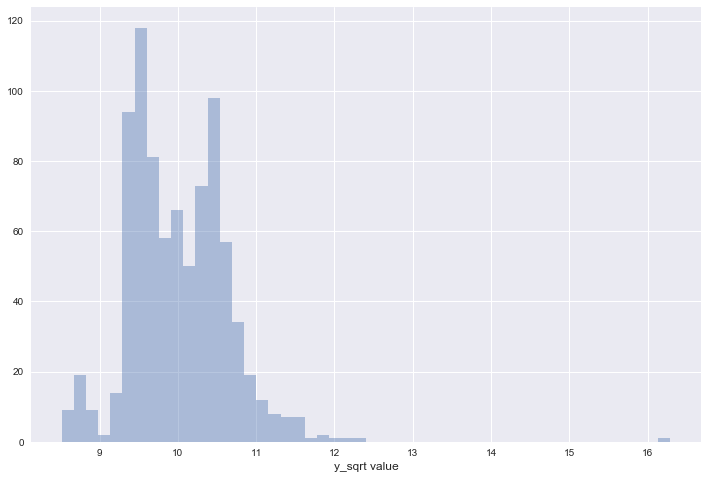

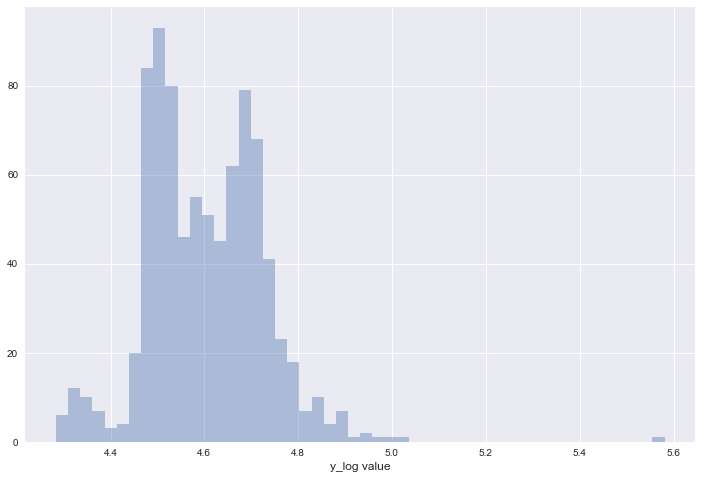

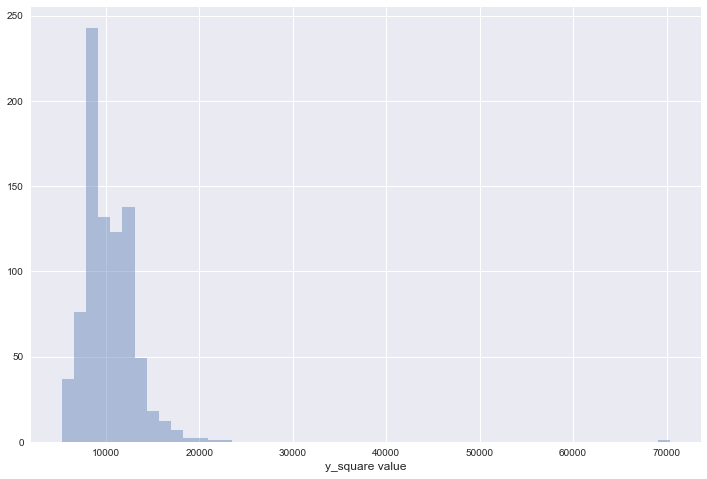

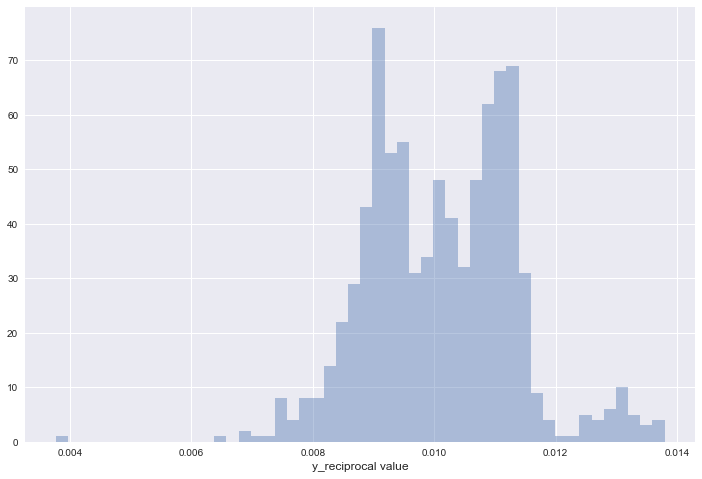

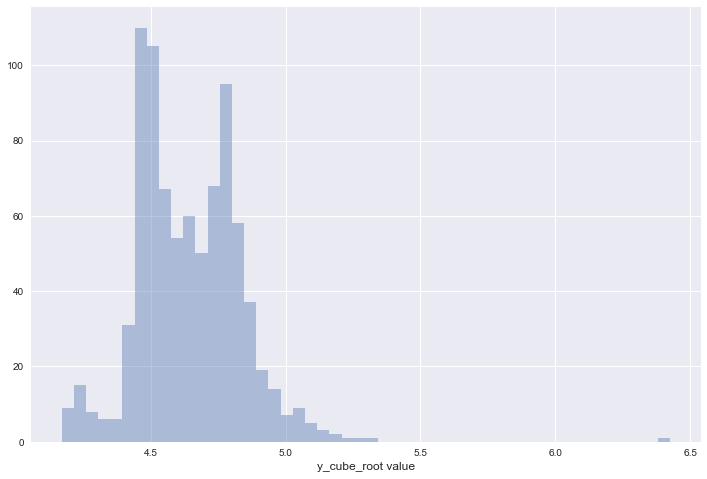

In [9]:
# try some transformation to y variable for valid
## sqrt root transform
valid['y_sqrt'] = np.sqrt(valid['y'])
plt.figure(figsize=(12,8))
sns.distplot(valid.y_sqrt.values, bins=50, kde=False)
plt.xlabel('y_sqrt value', fontsize=12)
plt.show()

##  log transform
valid['y_log'] = np.log(valid['y'])
plt.figure(figsize=(12,8))
sns.distplot(valid.y_log.values, bins=50, kde=False)
plt.xlabel('y_log value', fontsize=12)
plt.show()

## square transform
valid['y_square'] = np.square(valid['y'])
plt.figure(figsize=(12,8))
sns.distplot(valid.y_square.values, bins=50, kde=False)
plt.xlabel('y_square value', fontsize=12)
plt.show()

## reciprocal transform
valid['y_reciprocal'] = np.reciprocal(valid['y'])
plt.figure(figsize=(12,8))
sns.distplot(valid.y_reciprocal.values, bins=50, kde=False)
plt.xlabel('y_reciprocal value', fontsize=12)
plt.show()

## cube root transform
valid['y_cube_root'] = np.cbrt(valid['y'])
plt.figure(figsize=(12,8))
sns.distplot(valid.y_cube_root.values, bins=50, kde=False)
plt.xlabel('y_cube_root value', fontsize=12)
plt.show()

### according to the plots, we can see that the better transformation of y in valid is reciprocal transformation

In [10]:
valid = valid.drop(['y_sqrt', 'y_log', 'y_square','y_cube_root', 'y'], axis=1)

## Handle Outliers

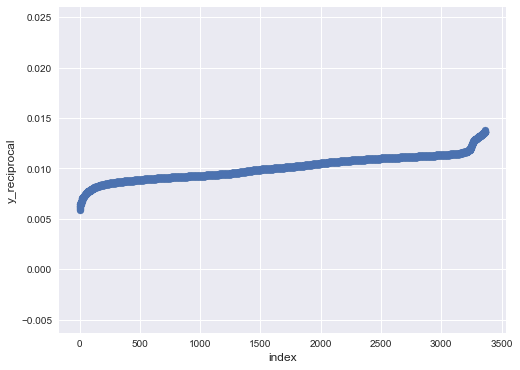

In [11]:
# plot target variable of train after transform 
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.y_reciprocal.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y_reciprocal', fontsize=12)
plt.show()

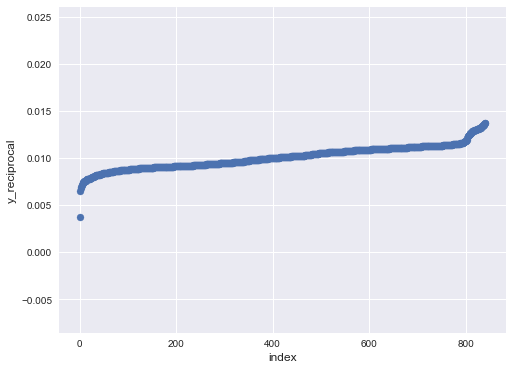

In [12]:
 # plot target variable of valid after transform 
plt.figure(figsize=(8,6))
plt.scatter(range(valid.shape[0]), np.sort(valid.y_reciprocal.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y_reciprocal', fontsize=12)
plt.show()

## Not sure whether need to deal with valid data????

## Check Multicollinearity

### using VIF, but stuccked with the import error: TimeSeries cannot be imoported

## Encode Categorical Variales

In [13]:
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(valid[c].values) + list(test[c].values))
        train[c] = lbl.transform(list(train[c].values))
        #valid[c] = lbl.transform(list(valid[c].values))
        test[c] = lbl.transform(list(test[c].values))

In [14]:
for c in valid.columns:
    if valid[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(valid[c].values))
        valid[c] = lbl.transform(list(valid[c].values))

In [15]:
train.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y_reciprocal
3175,6338,52,3,37,0,3,23,8,9,0,...,0,1,0,0,0,0,0,0,0,0.009268
2996,6009,51,3,9,2,3,23,9,23,0,...,0,1,0,0,0,0,0,0,0,0.010792
863,1716,46,1,37,2,3,6,8,14,0,...,0,0,0,0,0,0,0,0,0,0.010855
2819,5643,41,13,5,5,3,22,3,22,0,...,0,0,0,0,0,0,0,0,0,0.011007
2484,4977,36,10,19,2,3,20,11,13,0,...,0,1,0,0,0,0,0,0,0,0.009321


In [16]:
valid.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y_reciprocal
2580,5170,5,17,22,0,0,15,0,10,0,...,1,0,0,0,0,0,0,0,0,0.009083
642,1243,29,17,25,0,0,8,7,1,0,...,0,1,0,0,0,0,0,0,0,0.009855
12,34,31,3,6,2,0,10,6,12,0,...,0,1,0,0,0,0,0,0,0,0.012104
1833,3679,37,1,6,2,0,4,9,22,0,...,0,0,0,0,0,0,0,0,0,0.011227
2400,4813,28,11,3,5,0,16,9,22,0,...,0,0,0,0,0,0,0,0,0,0.010305


In [17]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,24,23,38,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,46,3,9,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,24,23,19,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,24,13,38,5,3,32,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,49,20,19,2,3,31,8,12,0,...,1,0,0,0,0,0,0,0,0,0


## Dimentionality Reduction

In [18]:
# extract numerical variables 
train_x = (train.ix[:,9:377].values).astype('int32')
train_y = train.ix[:,377].values.astype('float32')
valid_x = (valid.ix[:,9:377].values).astype('int32')
valid_y = valid.ix[:,377].values.astype('float32')
test_x = (test.ix[:,9:377].values).astype('int32')

/Users/lijingning/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app
/Users/lijingning/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:992: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  return getattr(section, self.name)[new_key]
/Users/lijingning/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Users/lijingning/anaconda/

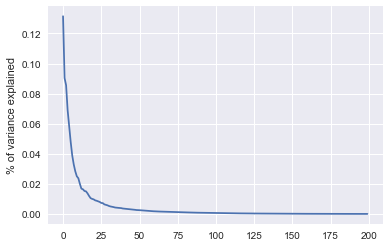

In [19]:
# principal conponent analysis to train
## PCA decomposition
pca = decomposition.PCA(n_components=200) #Finds first 200 PCs
pca.fit(train_x)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')

In [20]:
n_comp = 6

# PCA
pca = PCA(n_components=n_comp, random_state=420)
pca_results_train = pca.fit_transform(train_x)
pca_results_test = pca.transform(test_x)

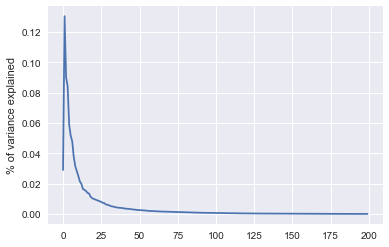

In [21]:
#  TruncatedSVD analysis to train
## TruncatedSVD decomposition
tsvd = decomposition.TruncatedSVD(n_components=200) #Finds first 200 PCs
tsvd.fit(train_x)
plt.plot(tsvd.explained_variance_ratio_)
plt.ylabel('% of variance explained')

In [22]:
n_comp = 6

# tSVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
tsvd_results_train = tsvd.fit_transform(train_x)
tsvd_results_test = tsvd.transform(test_x)

In [23]:
# ICA
n_comp = 6

ica = FastICA(n_components = 50, random_state=420)
ica_results_train = ica.fit_transform(train_x)
ica_results_test = ica.transform(test_x)

In [24]:
# GRP
n_comp = 20

grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
grp_results_train = grp.fit_transform(train_x)
grp_results_test = grp.transform(test_x)

In [25]:
# SRP
n_comp = 6

srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
srp_results_train = srp.fit_transform(train_x)
srp_results_test = srp.transform(test_x)

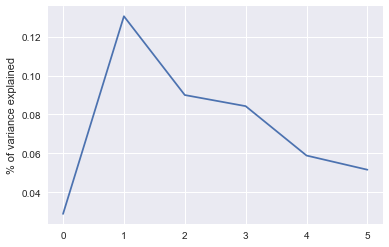

In [26]:
#  NMF analysis to train
## NMF decomposition
nmf = NMF(n_components=200) #Finds first 200 PCs
nmf.fit(train_x)
plt.plot(tsvd.explained_variance_ratio_)
plt.ylabel('% of variance explained')

In [27]:
# NMF
n_comp = 5

nmf = NMF(n_components=n_comp, random_state=420,alpha=.1, l1_ratio=.5)
nmf_results_train = nmf.fit_transform(train_x)
nmf_results_test = nmf.transform(test_x)

In [28]:
#save columns list before adding the decomposition components

usable_columns = list(set(train.columns) - set(['y_reciprocal']))

In [29]:
# Append decomposition components to datasets
n_comp = 6
for i in range(1, n_comp + 1):
    train['pca_' + str(i)] = pca_results_train[:, i - 1]
    test['pca_' + str(i)] = pca_results_test[:, i - 1]

    train['ica_' + str(i)] = ica_results_train[:, i - 1]
    test['ica_' + str(i)] = ica_results_test[:, i - 1]

    train['tsvd_' + str(i)] = tsvd_results_train[:, i - 1]
    test['tsvd_' + str(i)] = tsvd_results_test[:, i - 1]

    train['grp_' + str(i)] = grp_results_train[:, i - 1]
    test['grp_' + str(i)] = grp_results_test[:, i - 1]

    train['srp_' + str(i)] = srp_results_train[:, i - 1]
    test['srp_' + str(i)] = srp_results_test[:, i - 1]

n_comp = 5
for i in range(1, n_comp + 1):
    
    train['nmf_' + str(i)] = nmf_results_train[:, i - 1]
    test['nmf_' + str(i)] = nmf_results_test[:, i - 1]

### did the same thing to valid

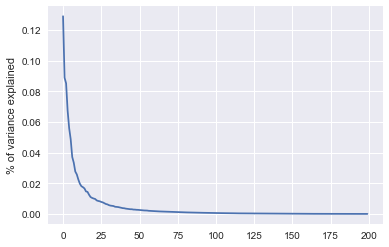

In [30]:
# principal conponent analysis to train
## PCA decomposition
pca = decomposition.PCA(n_components=200) #Finds first 200 PCs
pca.fit(valid_x)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')

In [31]:
n_comp = 6

# PCA
pca = PCA(n_components=n_comp, random_state=420)
pca_results_valid = pca.fit_transform(valid_x)

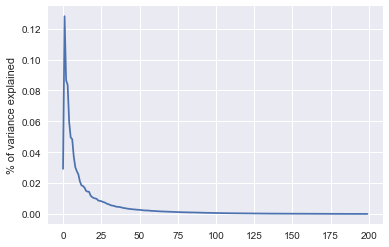

In [32]:
#  TruncatedSVD analysis to train
## TruncatedSVD decomposition
tsvd = decomposition.TruncatedSVD(n_components=200) #Finds first 200 PCs
tsvd.fit(valid_x)
plt.plot(tsvd.explained_variance_ratio_)
plt.ylabel('% of variance explained')

In [33]:
n_comp = 6

# tSVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
tsvd_results_valid = tsvd.fit_transform(valid_x)

In [34]:
# ICA
n_comp = 6

ica = FastICA(n_components = n_comp, random_state=420)
ica_results_valid = ica.fit_transform(valid_x)

In [35]:
# GRP
n_comp = 6

grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
grp_results_valid = grp.fit_transform(valid_x)

In [36]:
# SRP
n_comp = 6

srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
srp_results_valid = srp.fit_transform(valid_x)

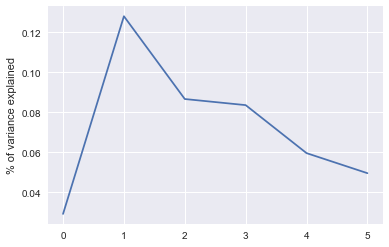

In [37]:
#  NMF analysis to train
## NMF decomposition
nmf = NMF(n_components=200) #Finds first 200 PCs
nmf.fit(valid_x)
plt.plot(tsvd.explained_variance_ratio_)
plt.ylabel('% of variance explained')

In [38]:
# NMF
n_comp = 5

nmf = NMF(n_components=n_comp, random_state=420,alpha=.1, l1_ratio=.5)
nmf_results_valid = nmf.fit_transform(valid_x)

In [39]:
# Append decomposition components to datasets
n_comp = 6
for i in range(1, n_comp + 1):
    valid['pca_' + str(i)] = pca_results_valid[:, i - 1]
    
    valid['ica_' + str(i)] = ica_results_valid[:, i - 1]
    
    valid['tsvd_' + str(i)] = tsvd_results_valid[:, i - 1]

    valid['grp_' + str(i)] = grp_results_valid[:, i - 1]
   
    valid['srp_' + str(i)] = srp_results_valid[:, i - 1]
    
n_comp = 5
for i in range(1, n_comp + 1):
    
    valid['nmf_' + str(i)] = nmf_results_valid[:, i - 1]

In [40]:
y_train = train['y_reciprocal'].values
y_valid = valid['y_reciprocal'].values
y_mean = np.mean(y_train)
id_test = test['ID'].values
#finaltrainset and finaltestset are data to be used only the stacked model (does not contain PCA, SVD... arrays) 
finaltrainset = train[usable_columns].values
finaltestset = test[usable_columns].values

In [41]:
class StackingEstimator(BaseEstimator, TransformerMixin):
    
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None, **fit_params):
        self.estimator.fit(X, y, **fit_params)
        return self
    def transform(self, X):
        X = check_array(X)
        X_transformed = np.copy(X)
        # add class probabilities as a synthetic feature
        if issubclass(self.estimator.__class__, ClassifierMixin) and hasattr(self.estimator, 'predict_proba'):
            X_transformed = np.hstack((self.estimator.predict_proba(X), X))

        # add class prodiction as a synthetic feature
        X_transformed = np.hstack((np.reshape(self.estimator.predict(X), (-1, 1)), X_transformed))

        return X_transformed

In [42]:
'''Train the xgb model then predict the test data'''

xgb_params = {
    'n_trees': 520, 
    'eta': 0.0045,
    'max_depth': 5,
    'subsample': 0.93,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
    
}
# NOTE: Make sure that the class is labeled 'class' in the data file

dtrain = xgb.DMatrix(train.drop('y_reciprocal', axis=1), y_train)
dvalid = xgb.DMatrix(valid.drop('y_reciprocal', axis=1), y_valid)
dtest = xgb.DMatrix(test)

evalist  = [(dtrain,'train'),(dvalid,'eval')]

In [42]:
#cv_params = {'max_depth': [4,5,6], 'min_child_weight': [1,3,5]}
#ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             #'objective': 'binary:logistic'}
#optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            #cv_params, 
                             #scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation

In [43]:
num_boost_rounds = 1250
# train model
bst = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round = num_boost_rounds, evals = evalist, early_stopping_rounds=10)
y_pred = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)

'''Train the stacked models then predict the test data'''

stacked_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    StackingEstimator(estimator=GradientBoostingRegressor(learning_rate=0.001, loss="huber", max_depth=4, max_features=0.55, min_samples_leaf=18, min_samples_split=14, subsample=0.8)),
    LassoLarsCV()

)

[0]	train-rmse:0.001199	eval-rmse:0.001221
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.001195	eval-rmse:0.001218
[2]	train-rmse:0.001191	eval-rmse:0.001215
[3]	train-rmse:0.001187	eval-rmse:0.001212
[4]	train-rmse:0.001184	eval-rmse:0.001209
[5]	train-rmse:0.00118	eval-rmse:0.001206
[6]	train-rmse:0.001177	eval-rmse:0.001203
[7]	train-rmse:0.001173	eval-rmse:0.001199
[8]	train-rmse:0.00117	eval-rmse:0.001196
[9]	train-rmse:0.001166	eval-rmse:0.001193
[10]	train-rmse:0.001163	eval-rmse:0.00119
[11]	train-rmse:0.001159	eval-rmse:0.001187
[12]	train-rmse:0.001156	eval-rmse:0.001184
[13]	train-rmse:0.001152	eval-rmse:0.001181
[14]	train-rmse:0.001149	eval-rmse:0.001178
[15]	train-rmse:0.001145	eval-rmse:0.001175
[16]	train-rmse:0.001142	eval-rmse:0.001172
[17]	train-rmse:0.001139	eval-rmse:0.001169
[18]	train-rmse:0.001135	eval-rmse:0.001166
[19]	train-rmse:0.001132	eval-rmse

In [44]:
stacked_pipeline.fit(finaltrainset, y_train)
results = stacked_pipeline.predict(finaltestset)

'''R2 Score on the entire Train data when averaging'''

print('R2 score on train data:')
print(r2_score(y_train,stacked_pipeline.predict(finaltrainset)*0.3 + bst.predict(dtrain)*0.7))

'''Average the preditionon test data  of both models then save it on a csv file'''

sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = 1/y_pred*0.7 + 1/results*0.3
sub.to_csv('stacked-models_v15.csv', index=False)

/Users/lijingning/anaconda/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.424e-06, with an active set of 2 regressors, and the smallest cholesky pivot element being 1.054e-08
  ConvergenceWarning)
/Users/lijingning/anaconda/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.129e-06, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
/Users/lijingning/anaconda/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.339e-06, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
/Users/

R2 score on train data:
0.704149657717
